<a href="https://colab.research.google.com/github/PhinyadaPhen/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [91]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas
import pandas as pd

In [92]:
Name = 'ภิญญาดา เพ็ญสุข'
ID = '6230210522'

In [93]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [94]:
Data = DataGenerator(Name,ID)

021:22:12


In [95]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-8.590591,-3.384560,6.182718,-10.013727,-3.798767,-10.386514,-4.951959,4.412683,-4.209981,2.053323,-9.436627,7.189614,-7.128790,-6.411139,-1.171090,8.044543,4.895843,9.009631,5.613588,-2.318265,-2.903407,3.881669,-6.769120,21.408343
1,-1.780529,-4.050530,5.651998,-2.922966,-5.314078,-3.230391,4.816577,-4.308441,-5.471005,7.333923,1.486305,4.574943,8.483905,-3.641024,2.156536,-7.497718,8.401389,5.533454,2.371273,-5.433469,9.923802,-8.043338,-8.101059,-38.216691
2,-1.317042,-5.234922,5.785962,-2.759441,-4.191934,-1.691788,4.471417,-6.076208,-6.237195,7.449835,1.632279,4.951774,9.081778,-6.340779,1.470355,-5.382698,9.529785,6.343260,4.176402,-5.876628,9.225844,-9.399084,-10.469844,-44.995422
3,-2.890972,7.835401,8.801621,5.784255,1.195772,-6.683487,-4.455486,-4.591505,-2.522932,-0.802568,1.440209,-7.198531,5.487459,5.718287,5.860904,-3.967740,3.116904,3.084671,-2.715012,-1.836151,8.548597,0.524378,15.670803,4.621891
4,0.696475,-5.034636,5.928600,-5.211910,-6.003475,-1.638056,2.014188,-5.219334,-4.721540,8.374975,-0.454258,5.993044,7.062063,-4.993895,-0.792897,-6.587069,7.754338,5.317533,2.988931,-5.168134,9.749888,-9.344624,-10.069272,-44.723122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-7.578964,-3.595504,5.054173,-9.940088,-7.124007,-8.085441,-2.769145,2.588654,-5.477224,-0.194023,-8.711575,9.566052,-5.875453,-8.826926,-0.212664,6.717171,4.442475,8.913906,3.078284,-2.253711,-0.051820,3.362835,-7.191008,18.814176
9996,-6.233917,6.662471,8.533216,6.878110,0.480179,-5.905370,-5.053298,-3.598717,-3.335469,-1.148128,2.537946,-4.728113,5.028287,2.578534,8.117830,-4.211865,3.209944,4.391970,-2.225402,0.004109,5.442513,3.070636,13.324941,17.353181
9997,9.641212,-5.273755,-5.130493,6.274294,-4.651740,3.422169,8.745878,-7.716951,5.570299,-10.243794,-0.618124,-2.897298,4.748631,4.693753,-8.963484,-6.874213,1.495819,3.947954,-7.892559,1.745546,-5.095021,-0.374443,-10.547509,0.127783
9998,-1.583269,3.391245,-3.536525,2.780576,-0.937440,-7.751907,9.043572,-2.629062,-7.243474,-9.298432,-0.461757,-6.511084,4.468788,-7.858024,-10.332272,-7.718783,5.525522,3.399530,5.189234,7.473903,-6.619214,-0.209460,6.782490,0.952698


## ทำ Clustering แล้วทำ Visualize ข้อมูลแบบ 2 มิติ

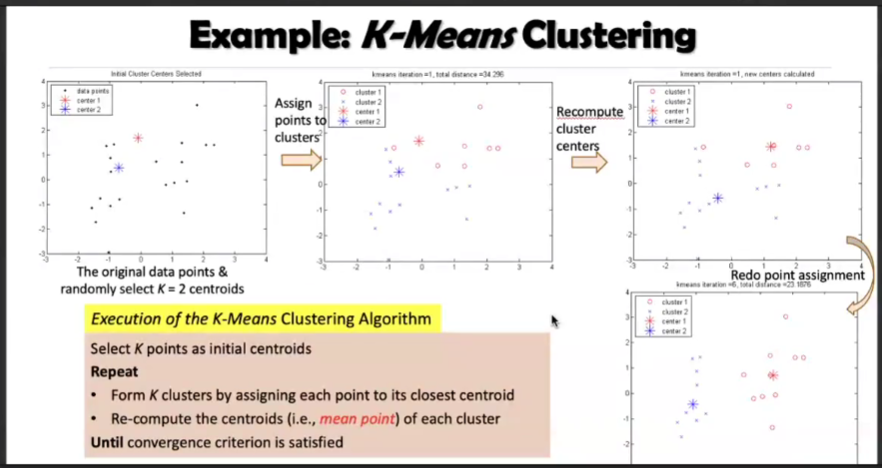

###KMean

import

In [96]:
from sklearn.cluster import KMeans

Define

In [97]:
kmeans = KMeans(n_clusters=2)  

Fit-transform

คำนวณหาจุด cluster center ของข้อมูล Data ด้วยวิธี K-Means clustering

In [98]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

แสดงจุด cluster center ที่คำนวณออกมาได้

In [99]:
kmeans.cluster_centers_

array([[  2.31275335,  -0.73466252,   0.31673758,   1.42950861,
          3.2916698 ,   3.50019558,   1.06313516,  -3.63231485,
          1.44637978,  -0.6613262 ,   3.07350551,   2.52476248,
          4.07251509,   1.90202844,   4.33624582,  -3.03118871,
          7.53530693,   0.72405179,   3.68770551,  -1.34886669,
          4.80265347,  -7.75900429,  -1.46932504, -36.79502144],
       [  1.51789998,   1.53746885,   1.64885521,   0.93036502,
         -1.8415187 ,  -1.23338979,   1.14911788,  -1.75227839,
         -3.08868309,  -2.60182838,  -2.28667133,   0.23918935,
          1.8121895 ,  -2.92862389,   1.00497304,  -2.85851709,
          2.37219228,   0.79702826,  -0.4264177 ,  -1.0611875 ,
          0.66867981,   1.71796708,   3.07493771,  10.58983541]])

ทดสอบการจัดกลุ่มของข้อมูล

In [100]:
a = kmeans.predict(Data)
a

array([1, 0, 0, ..., 1, 1, 1], dtype=int32)

### Visualize ข้อมูลแบบ 2 มิติ

Scatter plot

In [101]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

new_pcadata = pca.fit_transform(Data)

In [102]:
new_pcadata

array([[-24.98774261, -12.5470899 ],
       [ 38.43197383,  -1.87986518],
       [ 45.57100436,  -3.15279585],
       ...,
       [  3.59863442, -15.32159545],
       [ -4.13380311,  -2.71663962],
       [  4.2429027 ,   3.84552382]])

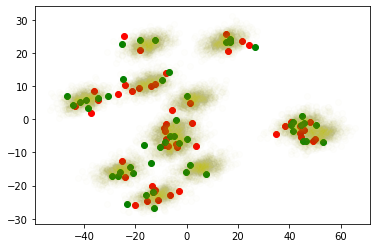

In [103]:
plt.plot(new_pcadata[:50,0],new_pcadata[:50,1],'or',alpha=1)
plt.plot(new_pcadata[50:100,0],new_pcadata[50:100,1],'og',alpha=1)
plt.plot(new_pcadata[100:,0],new_pcadata[100:,1],'oy',alpha=0.01)

Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4029fc1510>,
      dtype=object)

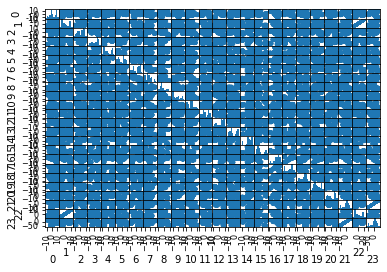

In [86]:
pd.plotting.scatter_matrix(Data)

SSE 

In [87]:
kmeans.cluster_centers_

array([[  1.51685527,   1.53686127,   1.64847688,   0.93030831,
         -1.84277352,  -1.23434784,   1.15065226,  -1.75314916,
         -3.08915123,  -2.60207851,  -2.28691225,   0.23955858,
          1.81305301,  -2.92965993,   1.00453223,  -2.85816348,
          2.3718399 ,   0.79668915,  -0.42700973,  -1.06050079,
          0.66950281,   1.71861132,   3.07372253,  10.59305661],
       [  2.31565317,  -0.73185858,   0.31844973,   1.42947968,
          3.29344521,   3.5012183 ,   1.05843423,  -3.62885881,
          1.44597143,  -0.66134715,   3.07205862,   2.52268877,
          4.06892603,   1.90325221,   4.33624508,  -3.0322096 ,
          7.53428463,   0.72512832,   3.68785161,  -1.35086876,
          4.79842377,  -7.75711992,  -1.46371715, -36.78559962]])

In [88]:
new_cluster_center = pca.transform(kmeans.cluster_centers_)

In [89]:
new_cluster_center

array([[-12.14984809,  -1.73233852],
       [ 37.50216698,   5.34709966]])

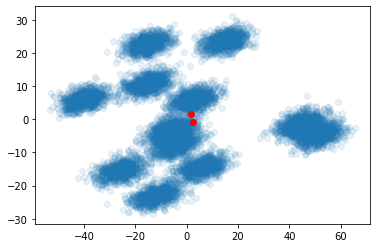

In [90]:
plt.scatter(new_pcadata[:,0],new_pcadata[:,1],alpha=0.1)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'or')